# Multiple_Linear Regression



In [1]:
# importing required package

import pandas as pd

import numpy as np

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()   # reading the dataset

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
df.shape  #looking for row and columns present in the data

(52, 6)

# Pre-processing the Data

In [4]:
df.isnull().sum()  # checking for missing values and count of the missing values

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.dtypes  # checking columns are in the right format

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [6]:
df = df.drop_duplicates()  # removing the duplicates in the data 

In [7]:
# checking for outliers by IQR method

df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [8]:
iqr = df.YSdeg.quantile(0.75) - df.YSdeg.quantile(0.25)  # (q3 - q1)

upper_threshold = df.YSdeg.quantile(0.75) + (1.5 * iqr)  # (q3 + (1.5 * iqr))

lower_threshold = df.YSdeg.quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold

(48.0, -18.0)

In [9]:
df.Sex = df.Sex.clip(-1.5 , 2.5)  # treating outliers for Sex column

In [10]:
df.Rank = df.Rank.clip(-2 , 6)  # treating outliers for Rank column

In [11]:
df.Year = df.Year.clip(-9 , 23)  # treating outliers for Year column

In [12]:
df.Degree = df.Degree.clip(-1.5 , 2.5)  # treating outliers for Degree column

In [13]:
df.YSdeg = df.YSdeg.clip(-18 , 48)  # treating outliers for YSdeg column

In [14]:
df.shape  # checking how many rows and column are present in the data 

(52, 6)

# EDA

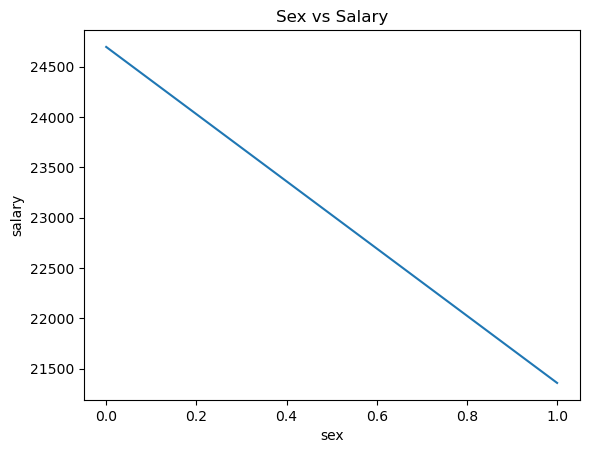

In [15]:
import matplotlib.pyplot as plt  # importing required package

#df['Sex_trans'] = np.exp(df['Sex'])  # transforming

df.groupby('Sex')['Salary'].mean().plot()

#df.plot(x = 'Sex' , y = 'Salary' , style = 'o')

plt.title('Sex vs Salary')

plt.xlabel('sex')

plt.ylabel('salary')

plt.show()

# 1) . There is linear releation between sex and salary.  2) . There is No Transformation required 

In [16]:

df[['Sex' , 'Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


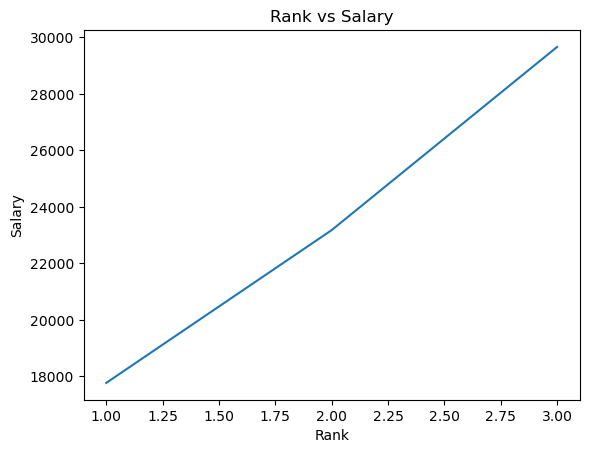

In [17]:
# Rank and Salary

df.groupby('Rank')['Salary'].mean().plot()

#df.plot(x = 'Rank' , y = 'Salary' , style = 'o')

plt.title('Rank vs Salary')

plt.xlabel('Rank')

plt.ylabel('Salary')

plt.show()

# 1) . There is linear releation between rank and salary.  2) . There is No Transformation required 

In [18]:
df[['Rank' , 'Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


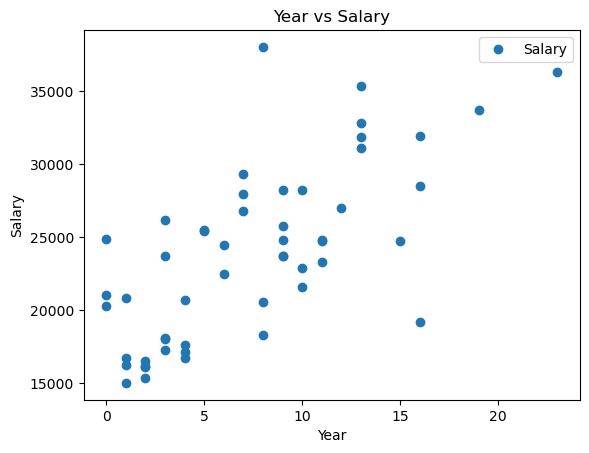

In [19]:
# year vs degree

df.plot(x = 'Year' , y = 'Salary' , style = 'o')

plt.title('Year vs Salary')

plt.xlabel('Year')

plt.ylabel('Salary')

plt.show()

In [20]:
# 1) . There is linear releationship between year and salary 2) . no transformation required

In [21]:
df[['Year' , 'Salary']].corr()

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


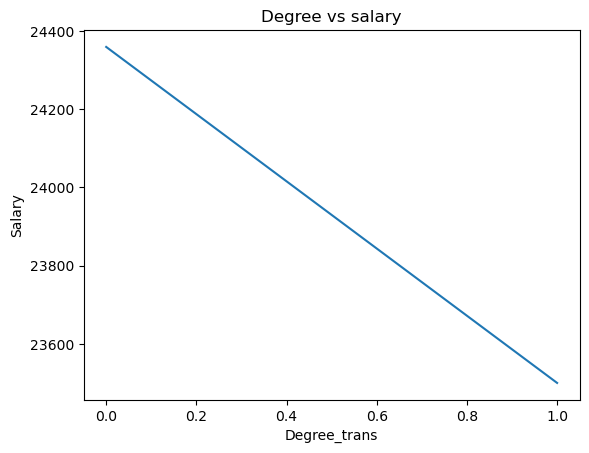

In [22]:
# degree vs salary

df['Degree_trans'] = np.power(df['Degree'],0.5)

df.groupby('Degree_trans')['Salary'].mean().plot()

#df.plot(x = 'Degree_trans' , y = 'Salary' , style = 'o')

plt.title('Degree vs salary')

plt.xlabel('Degree_trans')

plt.ylabel('Salary')

plt.show()

# 1).Tried all the transformations 2). There is no linear releationship bwt the degree and salary 3)_. so, we are dropping the feature 

In [23]:
df[['Degree_trans' , 'Salary']].corr()

,Degree_trans,Salary
Degree_trans,1.000000,-0.069726
Salary,-0.069726,1.000000


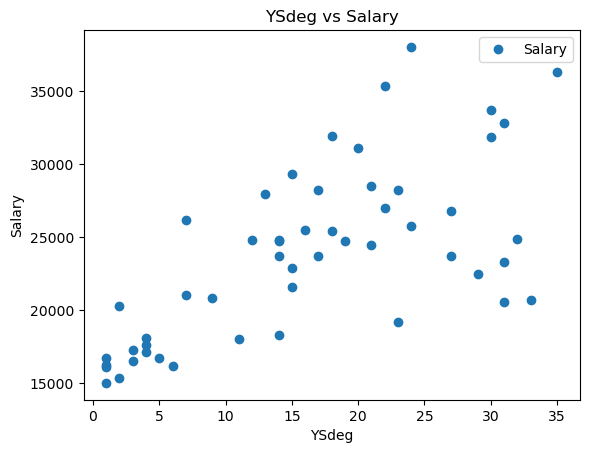

In [24]:
#YSdeg vs salary

df.plot(x = 'YSdeg' , y = 'Salary' , style = 'o')

plt.title('YSdeg vs Salary')

plt.xlabel('YSdeg')

plt.ylabel('Salary')

plt.show()

# 1). There is linear releation btw YSdeg and Salary  2). No transformation is required

In [25]:
df[['YSdeg' , 'Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


# There is no categorical Data present in the dataframe so we no need to encode the dataset

In [26]:
# splitting the data

X = df[['Sex', 'Rank', 'Year', 'YSdeg']].values  # array of features

y = df['Salary'].values  # array of target variable

In [27]:
from sklearn.model_selection import train_test_split  # impoting required package for train and split the data

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.30)

# Scaling the datd

In [28]:
from sklearn.preprocessing import StandardScaler  # importing the required package for scaling the data

scaler = StandardScaler()  # initialize to a variable

scaler.fit(X_train)  # we are finding the values mean and standard deviation from the training data

X_train_scaled = scaler.transform(X_train)  # fit mean and SD from the training data

X_test_scaled = scaler.transform(X_test)  # transforming the data

# Modeling the data

In [29]:
from sklearn.linear_model import LinearRegression  # importing the linear model

regressor = LinearRegression()  # initialize to the variable

regressor.fit(X_train_scaled, y_train)  # fitting the linear model on training data

LinearRegression()

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, ['Sex', 'Rank', 'Year', 'YSdeg'], columns = ['coefficient'])

y_pred = regressor.predict(X_test_scaled)

coeff_df

,coefficient
Sex,687.921504
Rank,4313.059960
Year,2903.798413
YSdeg,-743.445323


In [31]:
regressor.intercept_  # c

24412.305555555555

In [32]:
df_ = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

df_

,Actual,Predicted
0,20999,19955.204208
1,24750,27030.395966
2,24832,24352.440822
3,18304,20200.255647
4,22906,24671.998713
5,21600,21185.102246
6,24800,25268.141258
7,26182,21536.193352
8,16500,16305.488965
9,17095,17290.335564


# Evaluating the model

In [34]:
from sklearn import metrics  # importing the required package for evaluate the model

print('R2 Score :', metrics.r2_score(y_test, y_pred))

R2 Score : 0.8915459170886317


# RFE

In [35]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Sex', 'Rank', 'Year',
       'YSdeg'],selector.support_))

[('Sex', False), ('Rank', True), ('Year', True), ('YSdeg', True)]